In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("movie_data.csv")
data.head()

,runtime,vote_average,release_month,Comedy,Crime,Drama,Action,Thriller,Romance,Adventure,...,Empty,TVMovie,Foreign,PC_class,log_raw_budget,log_raw_revenue,log_budget,log_revenue,log_popularity,log_vote_count
0,105.0,8.2,5,1,1,0,0,0,0,0,...,0,0,0,2,14.616391,17.661131,14.616391,17.661131,2.289601,8.460199
1,111.0,8.3,9,0,1,1,1,0,0,0,...,0,0,0,3,17.181426,18.221813,17.181426,18.221813,3.572093,9.278279
2,81.0,7.3,3,0,0,1,1,1,0,0,...,0,0,0,3,14.741554,16.299710,14.741554,16.299710,2.411977,7.303843
3,104.0,7.8,1,1,1,0,0,0,0,0,...,0,0,0,1,16.562782,18.685736,16.562782,18.685736,2.897458,8.782630
4,119.0,7.4,3,1,0,0,0,0,1,0,...,0,0,0,1,17.172408,20.671077,17.172408,20.671077,3.953932,8.633375


In [2]:
# show information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4473 entries, 0 to 4472
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   runtime          4473 non-null   float64
 1   vote_average     4473 non-null   float64
 2   release_month    4473 non-null   int64  
 3   Comedy           4473 non-null   int64  
 4   Crime            4473 non-null   int64  
 5   Drama            4473 non-null   int64  
 6   Action           4473 non-null   int64  
 7   Thriller         4473 non-null   int64  
 8   Romance          4473 non-null   int64  
 9   Adventure        4473 non-null   int64  
 10  Family           4473 non-null   int64  
 11  Fantasy          4473 non-null   int64  
 12  Animation        4473 non-null   int64  
 13  Mystery          4473 non-null   int64  
 14  ScienceFiction   4473 non-null   int64  
 15  Horror           4473 non-null   int64  
 16  History          4473 non-null   int64  
 17  War           

In [3]:
data.corr()

,runtime,vote_average,release_month,Comedy,Crime,Drama,Action,Thriller,Romance,Adventure,...,Empty,TVMovie,Foreign,PC_class,log_raw_budget,log_raw_revenue,log_budget,log_revenue,log_popularity,log_vote_count
runtime,1.000000,0.322883,0.078972,-0.278078,0.037728,0.285779,0.107804,0.024447,0.076930,0.023247,...,0.055872,-0.021387,-0.003242,-0.032147,0.220346,0.237182,0.220346,0.237182,0.063182,0.156058
vote_average,0.322883,1.000000,0.072223,-0.157932,0.045239,0.286868,-0.095096,-0.086292,0.024644,-0.027691,...,-0.038932,-0.028026,-0.006917,0.004488,-0.032670,0.183382,-0.032670,0.183382,0.225245,0.372317
release_month,0.078972,0.072223,1.000000,-0.019317,-0.032298,0.054191,-0.056336,-0.038977,-0.005795,0.002904,...,-0.011430,0.009126,0.002024,-0.050930,0.059646,0.066289,0.059646,0.066289,0.027094,0.061019
Comedy,-0.278078,-0.157932,-0.019317,1.000000,-0.110013,-0.232080,-0.204479,-0.383115,0.190982,-0.022706,...,-0.028411,-0.020083,-0.007746,-0.061467,-0.025460,-0.004142,-0.025460,-0.004142,-0.070609,-0.061326
Crime,0.037728,0.045239,-0.032298,-0.110013,1.000000,0.047244,0.153287,0.310203,-0.160031,-0.140241,...,-0.016106,-0.011385,-0.013147,-0.003089,-0.002895,-0.029981,-0.002895,-0.029981,-0.012378,0.026448
Drama,0.285779,0.286868,0.054191,-0.232080,0.047244,1.000000,-0.234047,-0.030420,0.192682,-0.245488,...,-0.033378,-0.006248,0.002801,0.163619,-0.159380,-0.183220,-0.159380,-0.183220,-0.191922,-0.138722
Action,0.107804,-0.095096,-0.056336,-0.204479,0.153287,-0.234047,1.000000,0.236580,-0.229985,0.282333,...,-0.023116,0.002798,-0.018870,-0.114745,0.228911,0.164512,0.228911,0.164512,0.176776,0.145068
Thriller,0.024447,-0.086292,-0.038977,-0.383115,0.310203,-0.030420,0.236580,1.000000,-0.212365,-0.095486,...,-0.022786,0.003152,-0.018601,-0.037731,0.032281,0.003560,0.032281,0.003560,0.055921,0.074600
Romance,0.076930,0.024644,-0.005795,0.190982,-0.160031,0.192682,-0.229985,-0.212365,1.000000,-0.137943,...,-0.017052,-0.012054,0.025190,0.041547,-0.074257,-0.055294,-0.074257,-0.055294,-0.124828,-0.086890
Adventure,0.023247,-0.027691,0.002904,-0.022706,-0.140241,-0.245488,0.282333,-0.095486,-0.137943,1.000000,...,-0.017971,0.030988,-0.014670,-0.169008,0.294214,0.242098,0.294214,0.242098,0.225818,0.214694


In [4]:
# import seaborn as sb
# import matplotlib.pyplot as plt

In [5]:
# del data['log_revenue']
# del data['log_raw_revenue']
# f = plt.figure(figsize=(24,24))
# sb.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f')

In [6]:
# convert numeric data into categorical data
data['release_month']=data['release_month'].astype("category")
data['PC_class']=data['PC_class'].astype("category")

# show information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4473 entries, 0 to 4472
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   runtime          4473 non-null   float64 
 1   vote_average     4473 non-null   float64 
 2   release_month    4473 non-null   category
 3   Comedy           4473 non-null   int64   
 4   Crime            4473 non-null   int64   
 5   Drama            4473 non-null   int64   
 6   Action           4473 non-null   int64   
 7   Thriller         4473 non-null   int64   
 8   Romance          4473 non-null   int64   
 9   Adventure        4473 non-null   int64   
 10  Family           4473 non-null   int64   
 11  Fantasy          4473 non-null   int64   
 12  Animation        4473 non-null   int64   
 13  Mystery          4473 non-null   int64   
 14  ScienceFiction   4473 non-null   int64   
 15  Horror           4473 non-null   int64   
 16  History          4473 non-null   int64   


In [7]:
data.columns

Index(['runtime', 'vote_average', 'release_month', 'Comedy', 'Crime', 'Drama',
       'Action', 'Thriller', 'Romance', 'Adventure', 'Family', 'Fantasy',
       'Animation', 'Mystery', 'ScienceFiction', 'Horror', 'History', 'War',
       'Music', 'Documentary', 'Western', 'Empty', 'TVMovie', 'Foreign',
       'PC_class', 'log_raw_budget', 'log_raw_revenue', 'log_budget',
       'log_revenue', 'log_popularity', 'log_vote_count'],
      dtype='object')

## Analyse raw data (before considering inflation)

In [8]:
# set inputs
X_raw = pd.concat([data['runtime'],data['vote_average'],data['release_month'],data['Comedy'],data['Crime'],data['Drama'],data['Action'],data['Thriller']
    ,data['Romance'],data['Adventure'],data['Family'],data['ScienceFiction'],data['Fantasy'],data['Horror'],
    data['Mystery'],data['Animation'],data['History'],data['War'],data['Music'],data['Western'],data['Documentary'],data['Empty'],data['TVMovie'],data['Foreign'],
              data['PC_class'],data['log_raw_budget'],data['log_popularity'],data['log_vote_count']],axis=1)
# set target value
Y_raw = data['log_raw_revenue']

In [9]:
from sklearn.model_selection import train_test_split

#split data into train dataset and test data set randomly
X_train, X_test, y_train, y_test = train_test_split(X_raw, Y_raw, test_size=0.4)

####  Build 3 different models and see which one performs best.<br><br>1. Linear Regression Model <br>2. Ridge Regression Model  <br>3. LASSO Regression Model

### Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

# build model
model_LR = LinearRegression()

# fit model
model_LR.fit(X_train,y_train)

# print the coefficients
coeff_parameter = pd.DataFrame(model_LR.coef_,X_raw.columns,columns=['Coefficient'])
print(coeff_parameter)

                Coefficient
runtime            0.011876
vote_average       0.043660
release_month     -0.004141
Comedy             0.088978
Crime             -0.128467
Drama             -0.318318
Action             0.078809
Thriller          -0.104357
Romance            0.050114
Adventure         -0.027055
Family             0.241039
ScienceFiction    -0.386302
Fantasy           -0.135413
Horror             0.213364
Mystery           -0.091502
Animation          0.058812
History           -0.221067
War               -0.195606
Music              0.437732
Western           -0.582439
Documentary        0.582235
Empty              2.440406
TVMovie            3.254085
Foreign           -3.799102
PC_class          -0.118042
log_raw_budget     0.594995
log_popularity     0.002231
log_vote_count     0.518008


In [11]:
# make a prediction
prediction_LR_test = model_LR.predict(X_test)
prediction_LR_train = model_LR.predict(X_train)

from sklearn.metrics import mean_squared_error

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LR_train))
print("Explained Variance (R^2) on test \t:", model_LR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LR_test))
print("Explained Variance (R^2) on test \t:", model_LR.score(X_test, y_test))

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.4672905309382152
Explained Variance (R^2) on test 	: 0.6678000278744448
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.5722680946716685
Explained Variance (R^2) on test 	: 0.6293808709499739


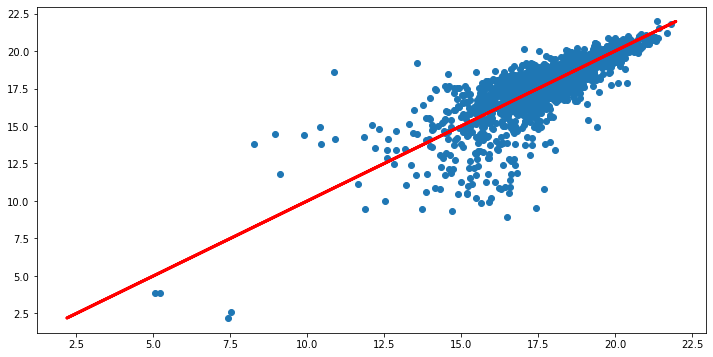

In [12]:
# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_LR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

### Ridge Regression Model

In [13]:
from sklearn.linear_model import Ridge

# define model
model_RR = Ridge(alpha=1.0)

# fit model
model_RR.fit(X_train, y_train)

# print the coefficients
coeff_parameter = pd.DataFrame(model_RR.coef_,X_raw.columns,columns=['Coefficient'])
print(coeff_parameter)

                Coefficient
runtime            0.011757
vote_average       0.047713
release_month     -0.004314
Comedy             0.082484
Crime             -0.129698
Drama             -0.324118
Action             0.073039
Thriller          -0.107706
Romance            0.044743
Adventure         -0.023966
Family             0.235786
ScienceFiction    -0.385026
Fantasy           -0.138628
Horror             0.210528
Mystery           -0.092925
Animation          0.049944
History           -0.222428
War               -0.197588
Music              0.430967
Western           -0.571382
Documentary        0.558103
Empty              1.936284
TVMovie            2.157348
Foreign           -1.858618
PC_class          -0.113717
log_raw_budget     0.600777
log_popularity     0.006280
log_vote_count     0.513093


In [14]:
# make a prediction
prediction_RR_test = model_RR.predict(X_test)
prediction_RR_train = model_RR.predict(X_train)

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_RR_train))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_RR_test))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_test, y_test))

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.469888808401514
Explained Variance (R^2) on test 	: 0.667211768301659
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.5584924739304298
Explained Variance (R^2) on test 	: 0.6326280961392043


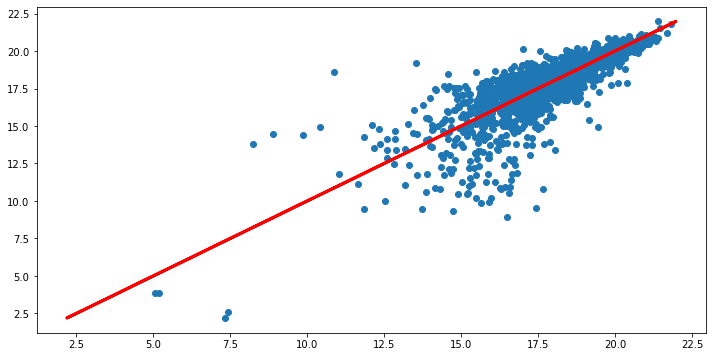

In [15]:
# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_RR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

### LASSO Regression Model

In [16]:
from sklearn.linear_model import Lasso

# define model
model_LAR = Lasso(alpha=1.0)

# fit model
model_LAR.fit(X_train, y_train)

# print the coefficients
coeff_parameter = pd.DataFrame(model_LAR.coef_,X_raw.columns,columns=['Coefficient'])
print(coeff_parameter)

                Coefficient
runtime            0.011921
vote_average       0.000000
release_month      0.000000
Comedy             0.000000
Crime             -0.000000
Drama             -0.000000
Action             0.000000
Thriller          -0.000000
Romance           -0.000000
Adventure          0.000000
Family             0.000000
ScienceFiction     0.000000
Fantasy            0.000000
Horror            -0.000000
Mystery           -0.000000
Animation          0.000000
History           -0.000000
War               -0.000000
Music              0.000000
Western           -0.000000
Documentary       -0.000000
Empty              0.000000
TVMovie            0.000000
Foreign           -0.000000
PC_class          -0.000000
log_raw_budget     0.356157
log_popularity     0.000000
log_vote_count     0.291137


In [17]:
# make a prediction
prediction_LAR_test = model_LAR.predict(X_test)
prediction_LAR_train = model_LAR.predict(X_train)

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LAR_train))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LAR_test))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_test, y_test))

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 2.0770456782776505
Explained Variance (R^2) on test 	: 0.5297492201587752
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 2.055131523834804
Explained Variance (R^2) on test 	: 0.5155590461778307


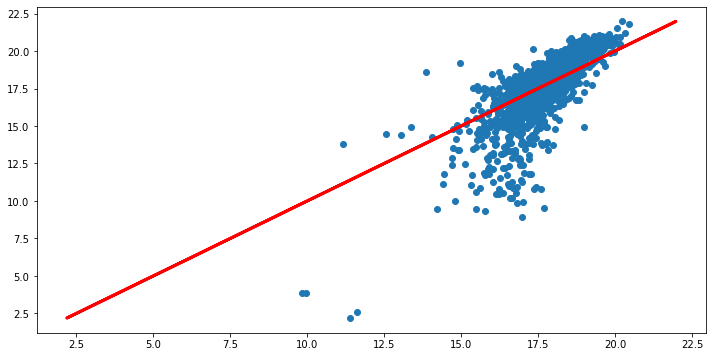

In [18]:
# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_LAR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

### Summary

In [19]:
print("Prediction performance --- Linear Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LR_train))
print("Explained Variance (R^2) on test \t:", model_LR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LR_test))
print("Explained Variance (R^2) on test \t:", model_LR.score(X_test, y_test))

print()

print("Prediction performance --- Ridge Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_RR_train))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_RR_test))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_test, y_test))

print()

print("Prediction performance --- LASSO Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LAR_train))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LAR_test))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_test, y_test))

Prediction performance --- Linear Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.4672905309382152
Explained Variance (R^2) on test 	: 0.6678000278744448
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.5722680946716685
Explained Variance (R^2) on test 	: 0.6293808709499739

Prediction performance --- Ridge Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.469888808401514
Explained Variance (R^2) on test 	: 0.667211768301659
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.5584924739304298
Explained Variance (R^2) on test 	: 0.6326280961392043

Prediction performance --- LASSO Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) on test 	: 2.0770456782776505
Explained Variance (R^2) on test 	: 0.5297492201587752
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 2.055131523834804
Explained Variance (R^2) on test 	: 0.5155590461778307


## Analyse modified data (after considering inflation)

In [20]:
# set inputs
X = pd.concat([data['runtime'],data['vote_average'],data['release_month'],data['Comedy'],data['Crime'],data['Drama'],data['Action'],data['Thriller']
    ,data['Romance'],data['Adventure'],data['Family'],data['ScienceFiction'],data['Fantasy'],data['Horror'],
    data['Mystery'],data['Animation'],data['History'],data['War'],data['Music'],data['Western'],data['Documentary'],data['Empty'],data['TVMovie'],data['Foreign'],
              data['PC_class'],data['log_budget'],data['log_popularity'],data['log_vote_count']],axis=1)
# set target value
Y = data['log_revenue']

In [21]:
from sklearn.model_selection import train_test_split

#split data into train dataset and test data set randomly
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

####  Build 3 different models and see which one performs best.<br><br>1. Linear Regression Model <br>2. Ridge Regression Model  <br>3. LASSO Regression Model

### Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

# build model
model_LR = LinearRegression()

# fit model
model_LR.fit(X_train,y_train)

# print the coefficients
coeff_parameter = pd.DataFrame(model_LR.coef_,X.columns,columns=['Coefficient'])
print(coeff_parameter)

                Coefficient
runtime            0.011203
vote_average       0.054115
release_month     -0.008600
Comedy             0.064400
Crime             -0.231424
Drama             -0.253268
Action             0.154894
Thriller          -0.123689
Romance            0.073863
Adventure         -0.019740
Family             0.357385
ScienceFiction    -0.400830
Fantasy           -0.270164
Horror             0.191144
Mystery           -0.047232
Animation          0.044194
History           -0.061412
War               -0.176682
Music              0.140187
Western           -0.557544
Documentary        0.780139
Empty              2.549955
TVMovie            2.609408
Foreign           -1.970512
PC_class          -0.107919
log_budget         0.584326
log_popularity    -0.092042
log_vote_count     0.562568


In [23]:
# make a prediction
prediction_LR_test = model_LR.predict(X_test)
prediction_LR_train = model_LR.predict(X_train)

from sklearn.metrics import mean_squared_error

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LR_train))
print("Explained Variance (R^2) on test \t:", model_LR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LR_test))
print("Explained Variance (R^2) on test \t:", model_LR.score(X_test, y_test))

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.5125537568974095
Explained Variance (R^2) on test 	: 0.6544513005028724
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.483278042498117
Explained Variance (R^2) on test 	: 0.6553697165589737


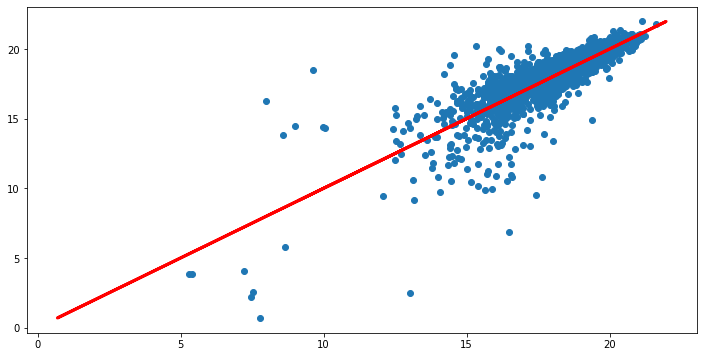

In [24]:
# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_LR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

### Ridge Regression Model

In [25]:
from sklearn.linear_model import Ridge

# define model
model_RR = Ridge(alpha=1.0)

# fit model
model_RR.fit(X_train, y_train)

# print the coefficients
coeff_parameter = pd.DataFrame(model_RR.coef_,X.columns,columns=['Coefficient'])
print(coeff_parameter)

                Coefficient
runtime            0.011131
vote_average       0.054830
release_month     -0.008602
Comedy             0.059438
Crime             -0.232670
Drama             -0.258525
Action             0.148690
Thriller          -0.124820
Romance            0.068874
Adventure         -0.018179
Family             0.351133
ScienceFiction    -0.396561
Fantasy           -0.270353
Horror             0.183899
Mystery           -0.049229
Animation          0.040553
History           -0.062815
War               -0.176415
Music              0.139507
Western           -0.542450
Documentary        0.726715
Empty              1.898070
TVMovie            1.945037
Foreign           -1.461445
PC_class          -0.106883
log_budget         0.586137
log_popularity    -0.089180
log_vote_count     0.559188


In [26]:
# make a prediction
prediction_RR_test = model_RR.predict(X_test)
prediction_RR_train = model_RR.predict(X_train)

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_RR_train))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_RR_test))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_test, y_test))

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.5137936982914604
Explained Variance (R^2) on test 	: 0.6541680311418906
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.48249891820143
Explained Variance (R^2) on test 	: 0.6555507411676511


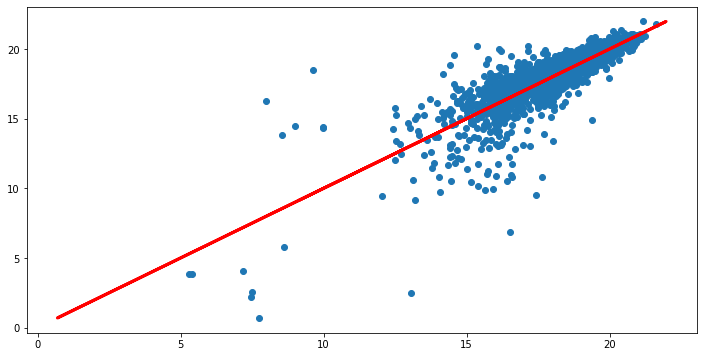

In [27]:
# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_RR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

### LASSO Regression Model

In [28]:
from sklearn.linear_model import Lasso

# define model
model_LAR = Lasso(alpha=1.0)

# fit model
model_LAR.fit(X_train, y_train)

# print the coefficients
coeff_parameter = pd.DataFrame(model_LAR.coef_,X.columns,columns=['Coefficient'])
print(coeff_parameter)

                Coefficient
runtime            0.011967
vote_average       0.000000
release_month      0.000000
Comedy             0.000000
Crime             -0.000000
Drama             -0.000000
Action             0.000000
Thriller          -0.000000
Romance           -0.000000
Adventure          0.000000
Family             0.000000
ScienceFiction     0.000000
Fantasy            0.000000
Horror            -0.000000
Mystery           -0.000000
Animation          0.000000
History           -0.000000
War               -0.000000
Music              0.000000
Western           -0.000000
Documentary       -0.000000
Empty              0.000000
TVMovie            0.000000
Foreign           -0.000000
PC_class          -0.000000
log_budget         0.312587
log_popularity     0.000000
log_vote_count     0.322030


In [29]:
# make a prediction
prediction_LAR_test = model_LAR.predict(X_test)
prediction_LAR_train = model_LAR.predict(X_train)

# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LAR_train))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LAR_test))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_test, y_test))

Performance on Train Data:
Mean Squared Error (MSE) on test 	: 2.12741616769529
Explained Variance (R^2) on test 	: 0.5139836275676044
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 2.0314288332508874
Explained Variance (R^2) on test 	: 0.5280103429465987


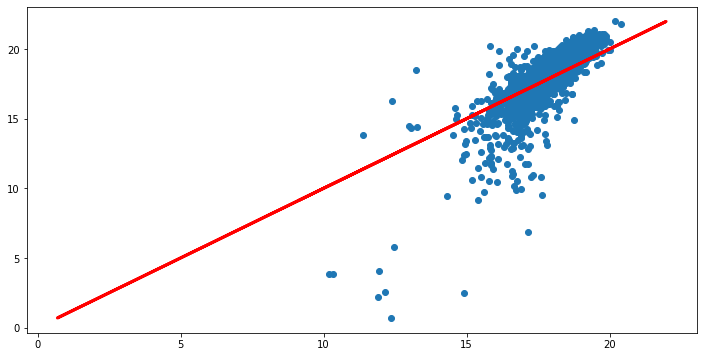

In [30]:
# plot graph
f = plt.figure(figsize=(12,6))
plt.scatter(prediction_LAR_test,y_test)
plt.plot(y_test,y_test,'r-',linewidth=3)
plt.show()

### Summary

In [31]:
print("Prediction performance --- Linear Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LR_train))
print("Explained Variance (R^2) on test \t:", model_LR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LR_test))
print("Explained Variance (R^2) on test \t:", model_LR.score(X_test, y_test))

print()

print("Prediction performance --- Ridge Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_RR_train))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_RR_test))
print("Explained Variance (R^2) on test \t:", model_RR.score(X_test, y_test))

print()

print("Prediction performance --- LASSO Regression Model:")
# print the Mean Squared Error (MSE) on Train Data and compare to the training
print("Performance on Train Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_train, prediction_LAR_train))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_train, y_train))

# print the Mean Squared Error (MSE) on Test Data and compare to the training
print("Performance on Test Data:")
print("Mean Squared Error (MSE) on test \t:", mean_squared_error(y_test, prediction_LAR_test))
print("Explained Variance (R^2) on test \t:", model_LAR.score(X_test, y_test))

Prediction performance --- Linear Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.5125537568974095
Explained Variance (R^2) on test 	: 0.6544513005028724
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.483278042498117
Explained Variance (R^2) on test 	: 0.6553697165589737

Prediction performance --- Ridge Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) on test 	: 1.5137936982914604
Explained Variance (R^2) on test 	: 0.6541680311418906
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 1.48249891820143
Explained Variance (R^2) on test 	: 0.6555507411676511

Prediction performance --- LASSO Regression Model:
Performance on Train Data:
Mean Squared Error (MSE) on test 	: 2.12741616769529
Explained Variance (R^2) on test 	: 0.5139836275676044
Performance on Test Data:
Mean Squared Error (MSE) on test 	: 2.0314288332508874
Explained Variance (R^2) on test 	: 0.5280103429465987


### <font color=green> According to the above results, 1. we find the <font size=5>Linear Regression Model</font> most useful in our case. And we will use this model for prediction use. 2. the data that <font size=5>has taken inflation into consideration</font> performs better. </font>